<a href="https://colab.research.google.com/github/hugomaharavo/Proyecto_Deep_Learning_2024.2/blob/main/04%20-%20Modelo%20final%20con%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
!kaggle datasets download -d imbikramsaha/food11
import zipfile
with zipfile.ZipFile('food11.zip', 'r') as zip_ref:
    zip_ref.extractall('food11')

Dataset URL: https://www.kaggle.com/datasets/imbikramsaha/food11
License(s): CC0-1.0
100% 519M/519M [00:04<00:00, 145MB/s]
100% 519M/519M [00:04<00:00, 127MB/s]


In [5]:
import os

# Definir rutas
train_dir = 'food11/food11/train'
test_dir = 'food11/food11/test'

# Función para contar imágenes en cada categoría
def count_images_in_directory(directory):
    category_counts = {}
    total_images = 0
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            category_counts[category] = num_images
            total_images += num_images
    return category_counts, total_images

# Contar imágenes en los conjuntos de entrenamiento y prueba
train_counts, train_total = count_images_in_directory(train_dir)
test_counts, test_total = count_images_in_directory(test_dir)

# Mostrar resultados
print("Conjunto de entrenamiento:")
for category, count in train_counts.items():
    print(f"  {category}: {count} imágenes")
print(f"Total de imágenes en el conjunto de entrenamiento: {train_total}")

print("\nConjunto de prueba:")
for category, count in test_counts.items():
    print(f"  {category}: {count} imágenes")
print(f"Total de imágenes en el conjunto de prueba: {test_total}")

Conjunto de entrenamiento:
  ice_cream: 900 imágenes
  pizza: 900 imágenes
  hamburger: 900 imágenes
  omelette: 900 imágenes
  hot_dog: 900 imágenes
  cheesecake: 900 imágenes
  french_fries: 900 imágenes
  apple_pie: 900 imágenes
  sushi: 900 imágenes
  fried_rice: 900 imágenes
  chicken_curry: 900 imágenes
Total de imágenes en el conjunto de entrenamiento: 9900

Conjunto de prueba:
  ice_cream: 100 imágenes
  pizza: 100 imágenes
  hamburger: 100 imágenes
  omelette: 100 imágenes
  hot_dog: 100 imágenes
  cheesecake: 100 imágenes
  french_fries: 100 imágenes
  apple_pie: 100 imágenes
  sushi: 100 imágenes
  fried_rice: 100 imágenes
  chicken_curry: 100 imágenes
Total de imágenes en el conjunto de prueba: 1100


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Aumento de datos mejorado para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

# Preprocesamiento para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Cargar datos de entrenamiento y prueba
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Cargar el modelo VGG16 con pesos preentrenados
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Construir el modelo con capas densas adicionales
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# Compilar el modelo con una tasa de aprendizaje reducida
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,043,659 (72.65 MB)

 Trainable params: 19,043,659 (72.65 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Entrenar el modelo
history = model.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
)

# Evaluar el modelo en el conjunto test
test_loss, test_accuracy = model.evaluate(test_data, verbose=1)
print(f"Precisión final del modelo en el conjunto de test: {test_accuracy * 100:.2f}%")

Epoch 1/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 65s 204ms/step - accuracy: 0.8084 - loss: 0.6384 - val_accuracy: 0.8200 - val_loss: 0.6068
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.8133 - loss: 0.6160 - val_accuracy: 0.8100 - val_loss: 0.6402
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 202ms/step - accuracy: 0.8198 - loss: 0.6004 - val_accuracy: 0.7955 - val_loss: 0.6554
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 65s 203ms/step - accuracy: 0.8253 - loss: 0.5819 - val_accuracy: 0.8109 - val_loss: 0.6205
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.8166 - loss: 0.6034 - val_accuracy: 0.8000 - val_loss: 0.6500
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.8270 - loss: 0.5719 - val_accuracy: 0.8127 - val_loss: 0.6008
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 65s 205ms/step - accuracy: 0.8300 - loss: 0.5474 - val_accuracy: 0.7955 - val_loss: 0.6560
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.8433 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


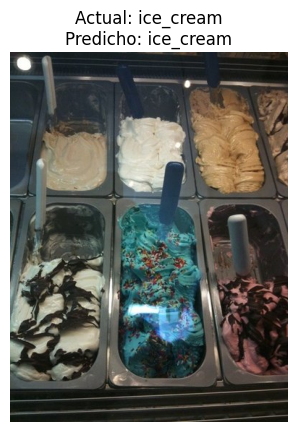

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


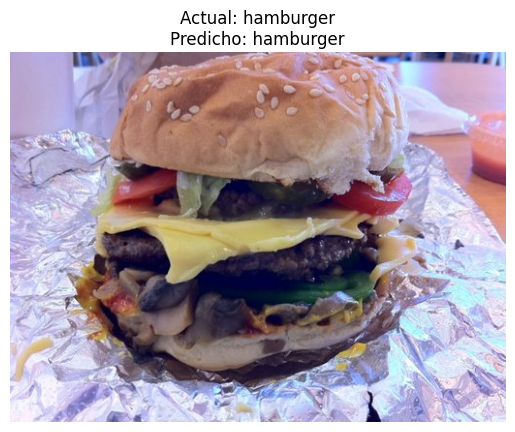

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


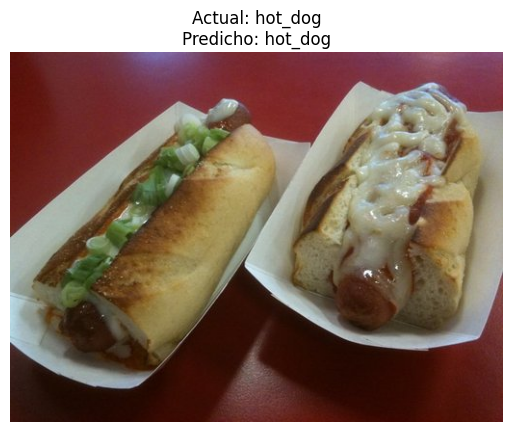

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


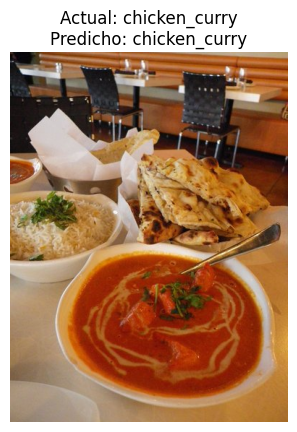

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


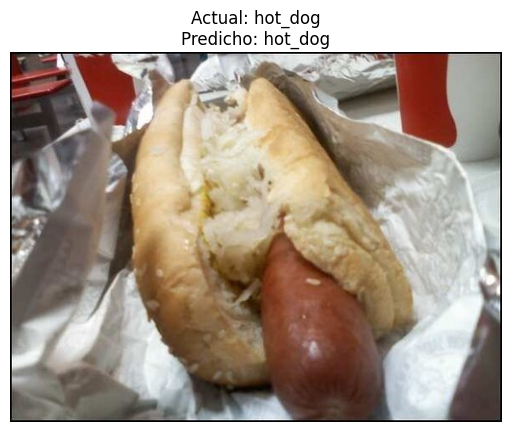

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


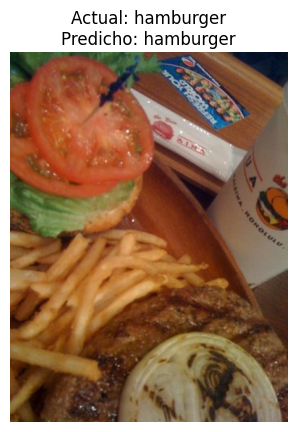

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


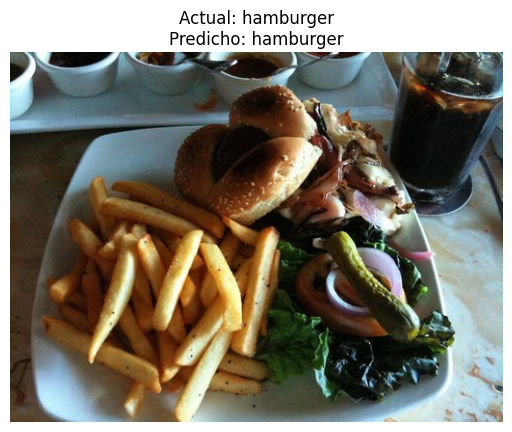

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


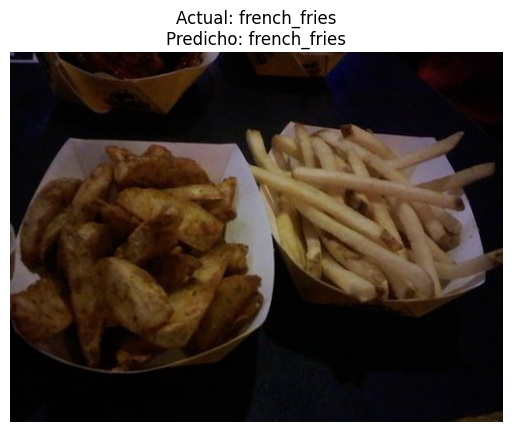

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


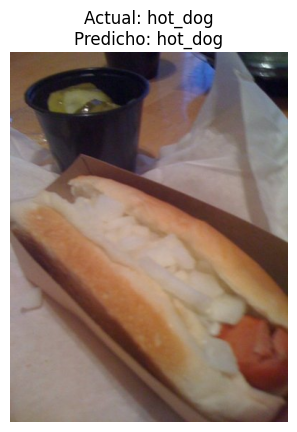

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


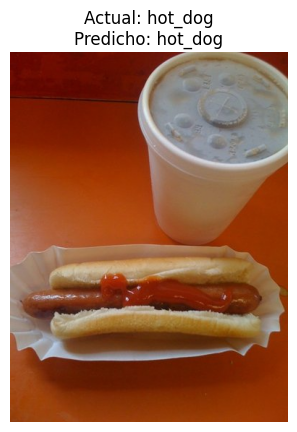

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


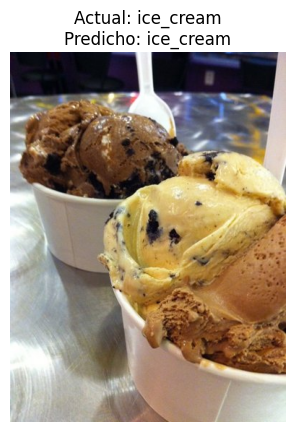

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


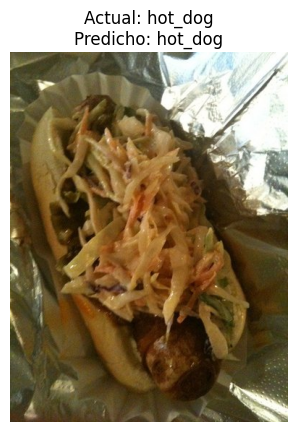

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


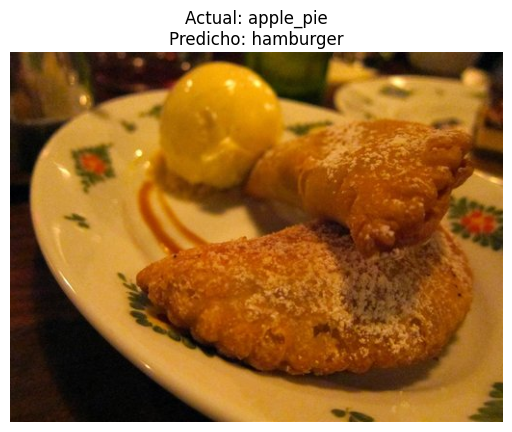

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


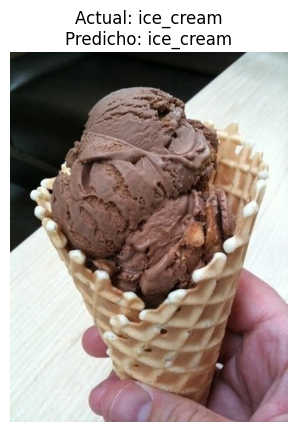

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


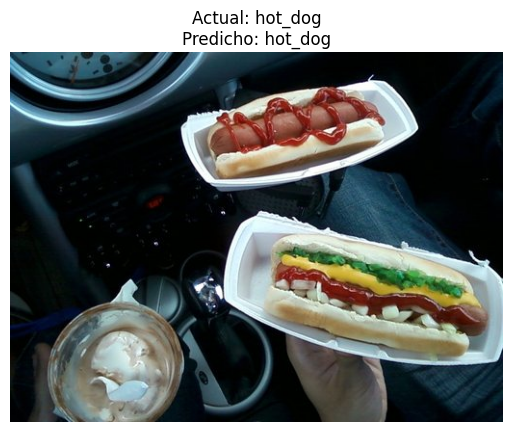

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


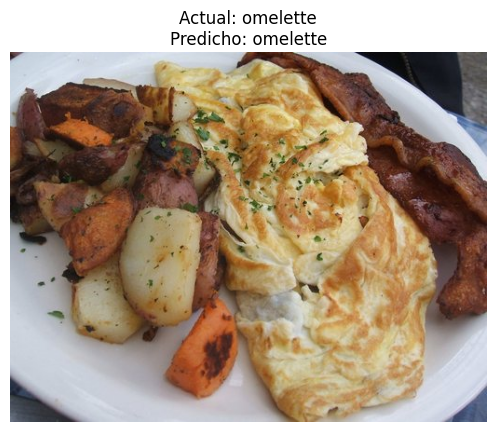

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


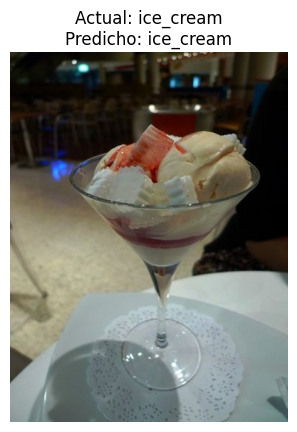

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


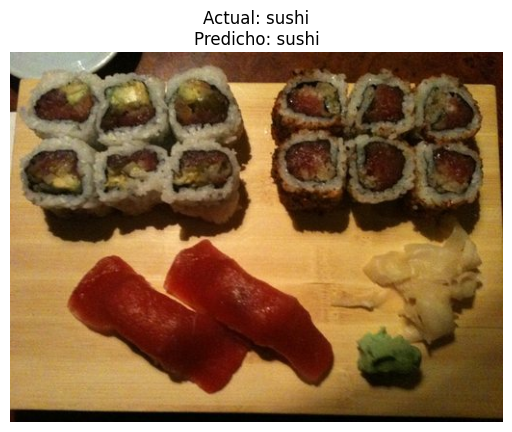

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


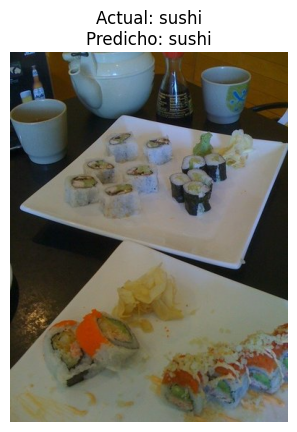

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


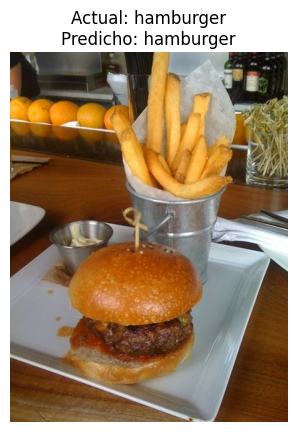

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

# Función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(128, 128))  # Redimensionar al tamaño de entrada del modelo
    img_array = img_to_array(img) / 255.0  # Escalar los valores de los píxeles
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de lote
    return img_array

# Función para mostrar y predecir una imagen aleatoria del conjunto de prueba
def predict_random_images(test_dir, num_images=5):
    # Lista de etiquetas de clase
    class_labels = list(train_data.class_indices.keys())

    for _ in range(num_images):
        # Elegir un tipo de comida aleatorio y una imagen aleatoria dentro de ese tipo de comida
        meal_type = random.choice(os.listdir(test_dir))
        meal_path = os.path.join(test_dir, meal_type)
        image_name = random.choice(os.listdir(meal_path))
        image_path = os.path.join(meal_path, image_name)

        # Cargar y preprocesar la imagen
        img_array = load_and_preprocess_image(image_path)

        # Hacer una predicción
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]

        # Mostrar la imagen y el resultado de la predicción
        plt.imshow(load_img(image_path))
        plt.axis('off')
        plt.title(f"Actual: {meal_type}\nPredicho: {predicted_class}")
        plt.show()

# Predecir y mostrar un conjunto de imágenes aleatorias
predict_random_images(test_dir, num_images=20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

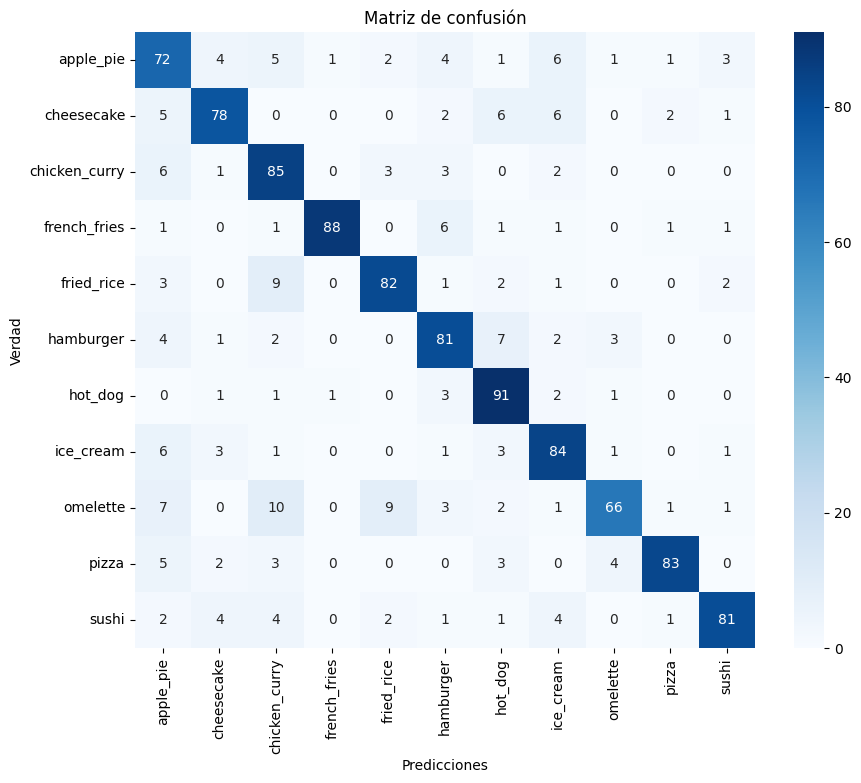

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener predicciones y etiquetas reales
y_true = []
y_pred = []

# Bucle para predecir todo el conjunto de pruebas
for i in range(len(test_data)):
    images, labels = test_data[i]
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))
    if i >= len(test_data) - 1:
        break

# Lista de nombres de clases
class_labels = list(train_data.class_indices.keys())

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Verdad")
plt.title("Matriz de confusión")
plt.show()

